# 32-bit vs 64-bit Builds: Comparison of Event Reconstruction Results

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import star.utils as stu
import star.phys as phys

import tk

In [2]:
labels = {
    '32_def': 'master-gcc485-root5_def-32',
    '32_sse': 'master-gcc485-root5_sse-32_sse',
    '64_def': 'master-gcc485-root5_def-64',
    '32_def_t': 'tests-gcc485-root5_def-32',
    '32_sse_t': 'tests-gcc485-root5_sse-32_sse',
    '64_def_t': 'tests-gcc485-root5_def-64'
}

fname  = 'st_physics_19114030_raw_4500023.MuDst.root'
fprefix = '/Users/dsmirnov/work/pub-data/star-32-vs-64-build'
#fprefix = 'https://github.com/plexoos/pub-data/raw/master/star-32-vs-64-build'

def fullname(flabel): return f'{fprefix}/install-star-cvs-{flabel}/{fname}'

rootfiles = { label: fullname(flabel) for label, flabel in labels.items()}

labels = labels.keys()
print(labels)
print(f'{len(rootfiles)} file(s)')

dict_keys(['32_def', '32_sse', '64_def', '32_def_t', '32_sse_t', '64_def_t'])
6 file(s)


## Track Parameters Comparison

In [3]:
branches = {
    'px': 'GlobalTracks.mP.mX1',
    'py': 'GlobalTracks.mP.mX2',
    'pz': 'GlobalTracks.mP.mX3',
}

### Default Builds

In [4]:
%%time
df_32_def, _ = stu.make_df(rootfiles['32_def'], 'MuDst', branches, {})
df_64_def, _ = stu.make_df(rootfiles['64_def'], 'MuDst', branches, {})

CPU times: user 1.41 s, sys: 96.5 ms, total: 1.51 s
Wall time: 1.65 s


In [5]:
df_32_def = stu.add_track_params(df_32_def)
df_64_def = stu.add_track_params(df_64_def)

### SSE + float-to-double Builds

In [6]:
%%time
df_32_sse_t, _ = stu.make_df(rootfiles['32_sse_t'], 'MuDst', branches, {})
df_64_def_t, _ = stu.make_df(rootfiles['64_def_t'], 'MuDst', branches, {})

CPU times: user 1.52 s, sys: 110 ms, total: 1.62 s
Wall time: 1.75 s


In [7]:
df_32_sse_t = stu.add_track_params(df_32_sse_t)
df_64_def_t = stu.add_track_params(df_64_def_t)

### Plots

In [8]:
tk.pltsavefig = True

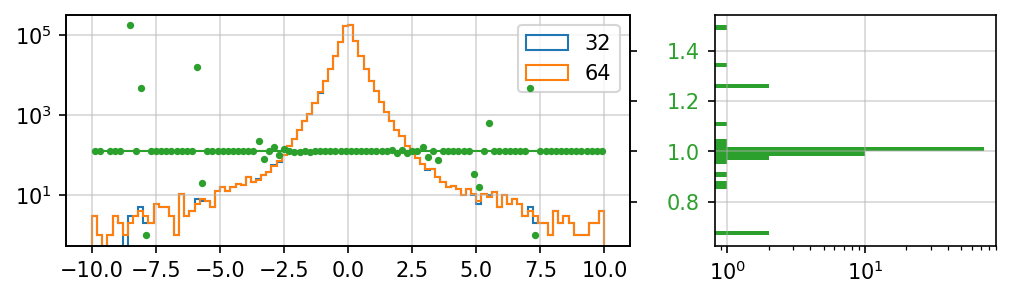

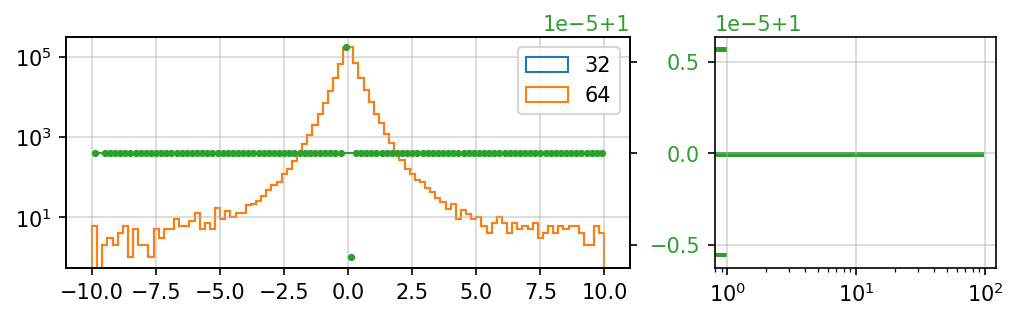

In [9]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'px', figsize=(8,2), bins=np.linspace(-10, 10, 101), histtype='step')

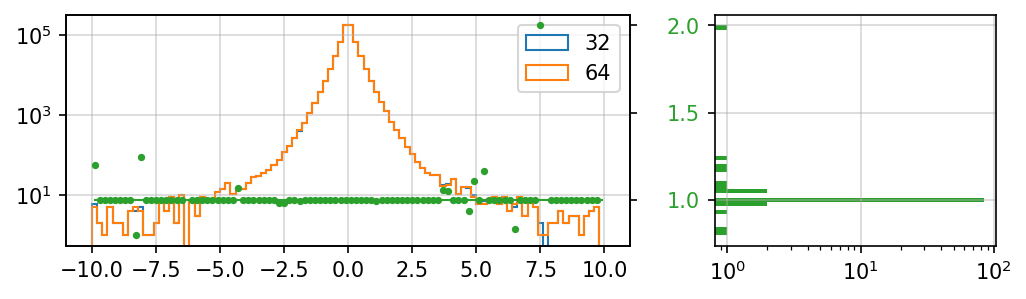

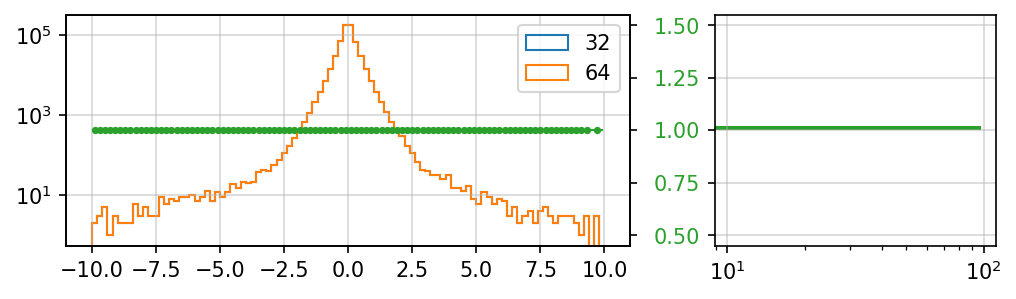

In [10]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'py', figsize=(8,2), bins=np.linspace(-10, 10, 101), histtype='step')

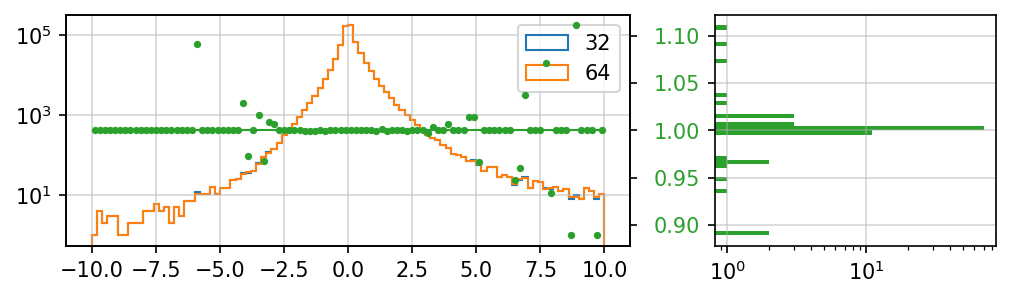

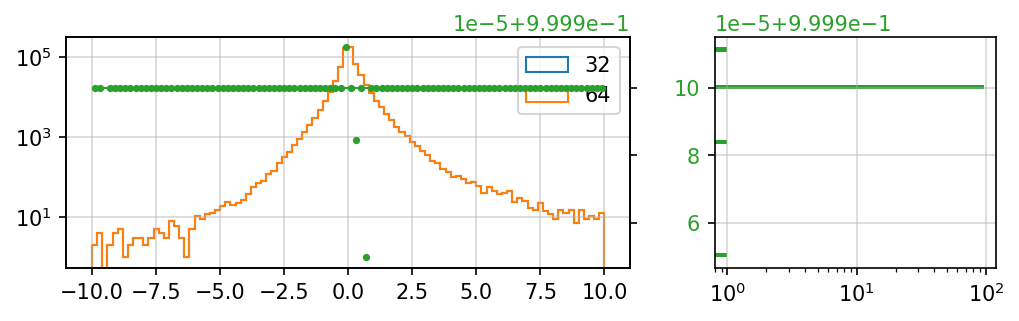

In [11]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'pz', figsize=(8,2), bins=np.linspace(-10, 10, 101), histtype='step')

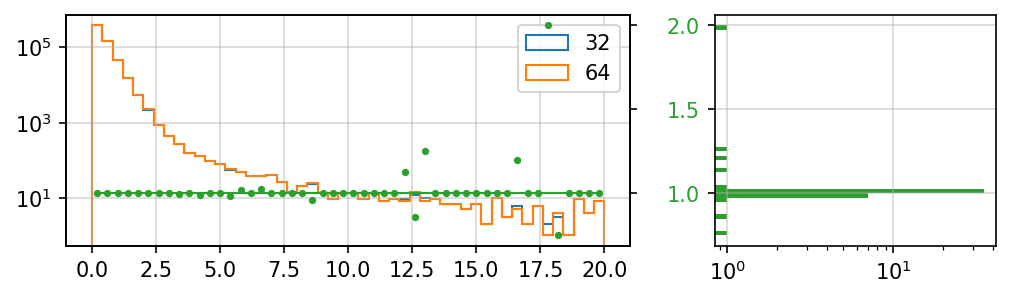

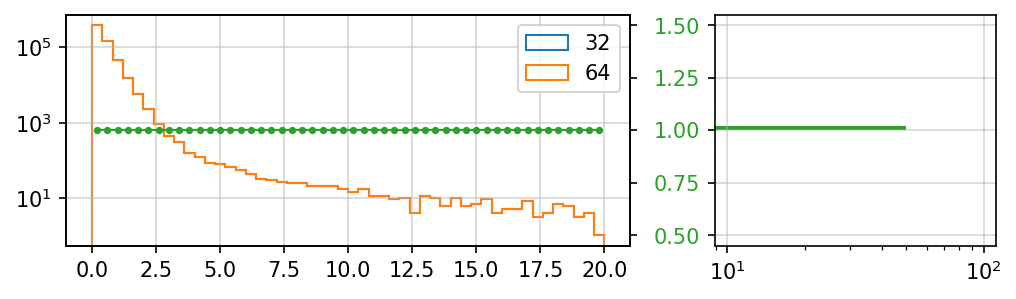

In [12]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'pt', figsize=(8,2), bins=np.linspace(0, 20, 51), histtype='step')

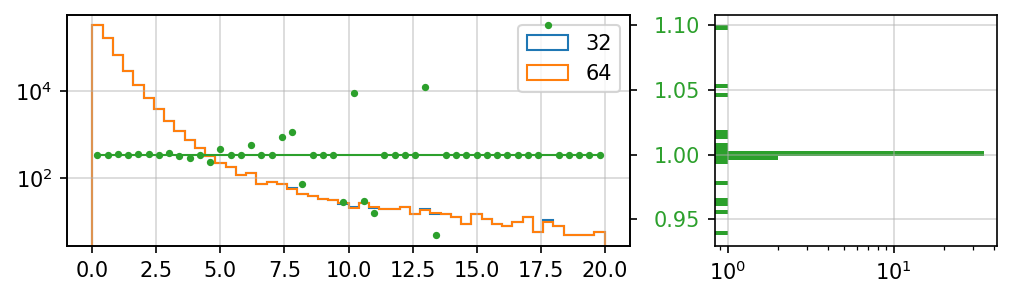

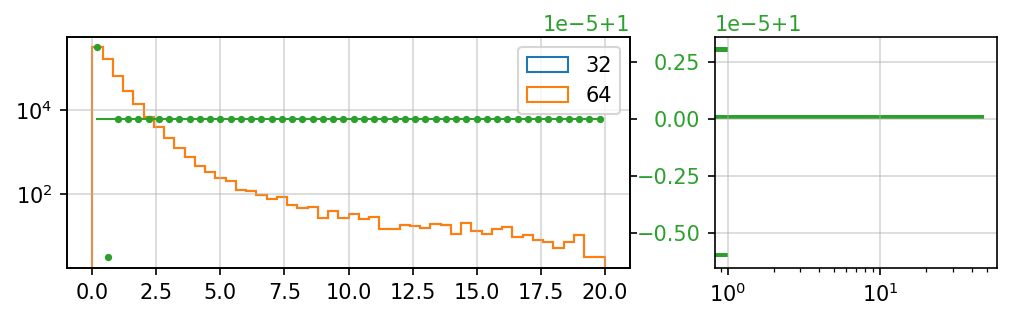

In [13]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'pm', figsize=(8,2), bins=np.linspace(0, 20, 51), histtype='step')

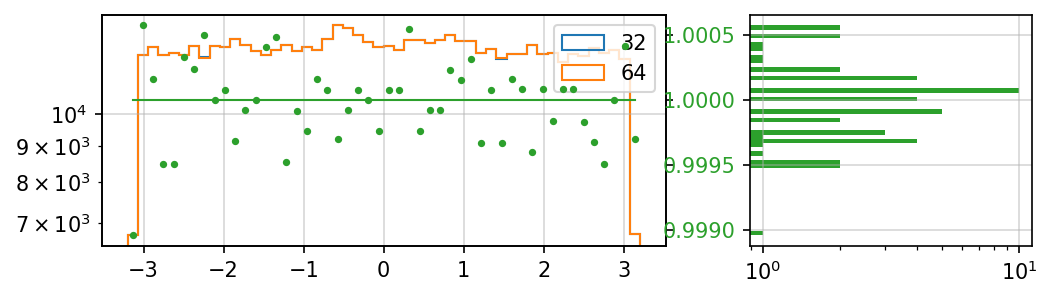

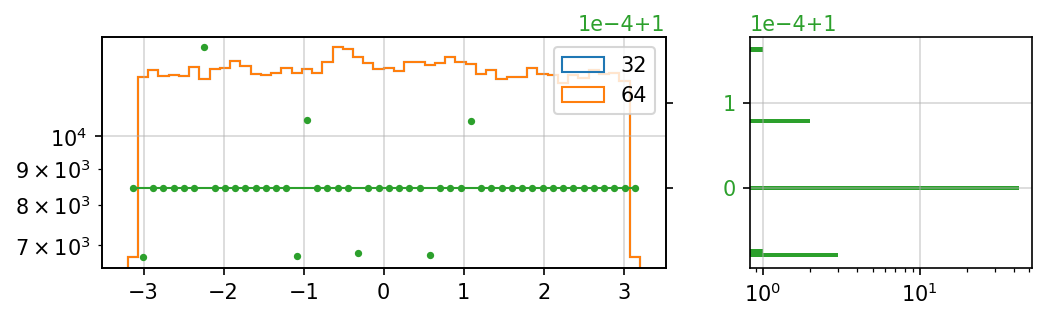

In [14]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'phi', figsize=(8,2), bins=np.linspace(-3.2, 3.2, 51), histtype='step')

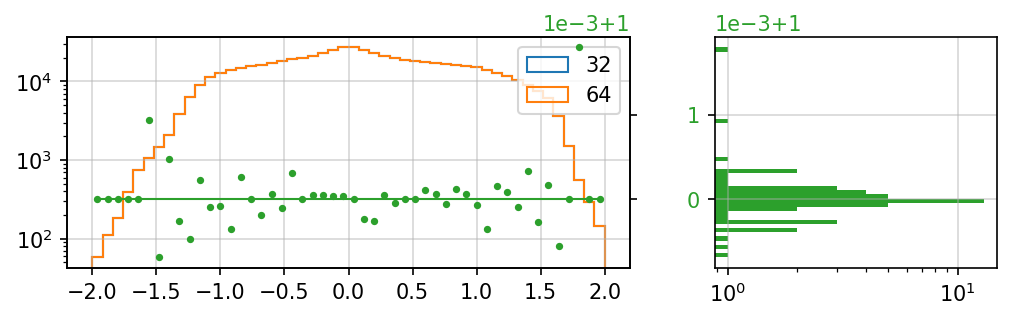

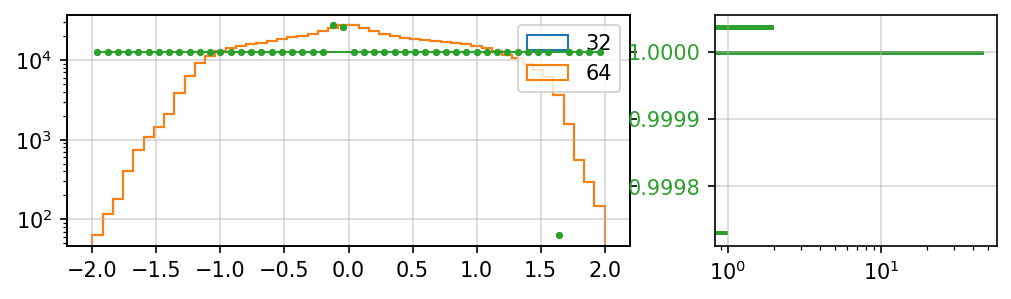

In [15]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'eta', figsize=(8,2), bins=np.linspace(-2, 2, 51), histtype='step')

## Vertex Parameters Comparison

In [16]:
branches = {
    'vx':  'PrimaryVertices.mPosition.mX1',
    'vy':  'PrimaryVertices.mPosition.mX2',
    'vz':  'PrimaryVertices.mPosition.mX3',
    'vxe': 'PrimaryVertices.mPosError.mX1',
    'vye': 'PrimaryVertices.mPosError.mX2',
    'vze': 'PrimaryVertices.mPosError.mX3',
}

### Default Builds

In [17]:
%%time
df_32_def, _ = stu.make_df(rootfiles['32_def'], 'MuDst', branches, {})
df_64_def, _ = stu.make_df(rootfiles['64_def'], 'MuDst', branches, {})

CPU times: user 1.17 s, sys: 17.6 ms, total: 1.19 s
Wall time: 1.22 s


### SSE + float-to-double Builds

In [18]:
%%time
df_32_sse_t, _ = stu.make_df(rootfiles['32_sse_t'], 'MuDst', branches, {})
df_64_def_t, _ = stu.make_df(rootfiles['64_def_t'], 'MuDst', branches, {})

CPU times: user 1.23 s, sys: 17.3 ms, total: 1.24 s
Wall time: 1.27 s


### Plots

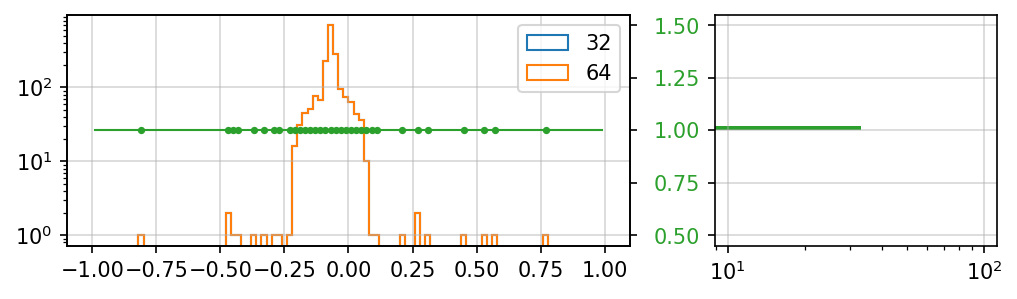

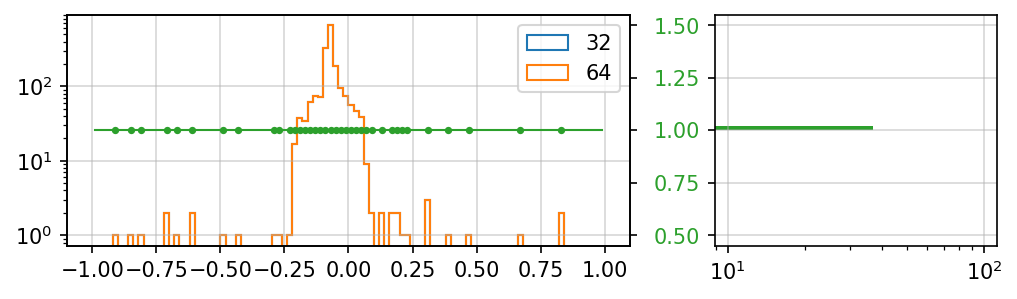

In [19]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'vx', figsize=(8,2), bins=np.linspace(-1, 1, 101), histtype='step')

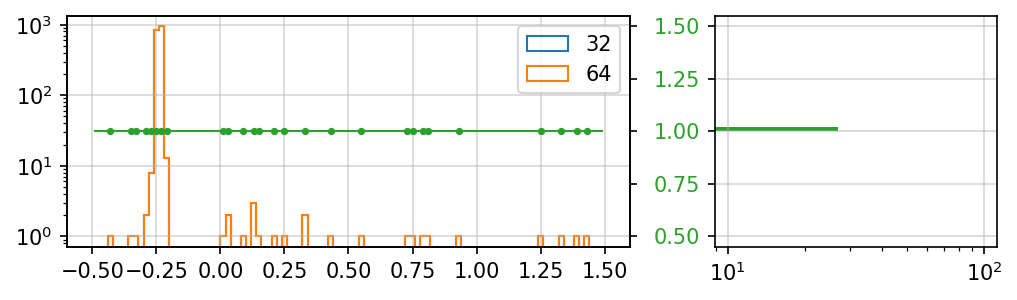

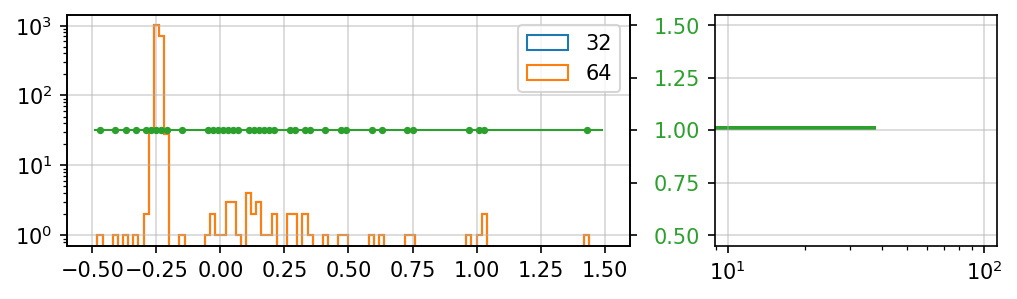

In [20]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'vy', figsize=(8,2), bins=np.linspace(-0.5, 1.5, 101), histtype='step')

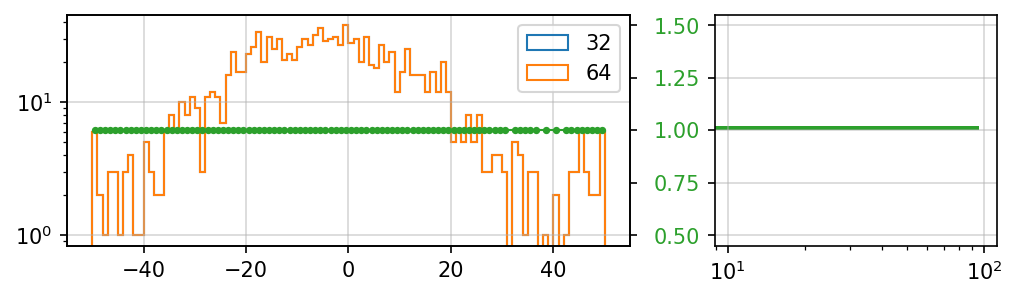

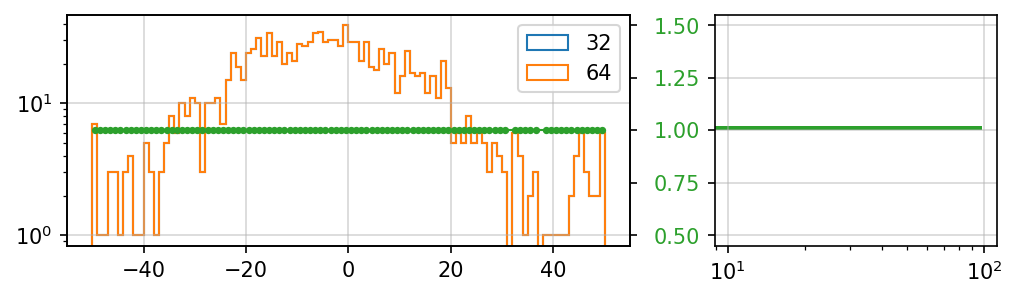

In [21]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'vz', figsize=(8,2), bins=np.linspace(-50, 50, 101), histtype='step')

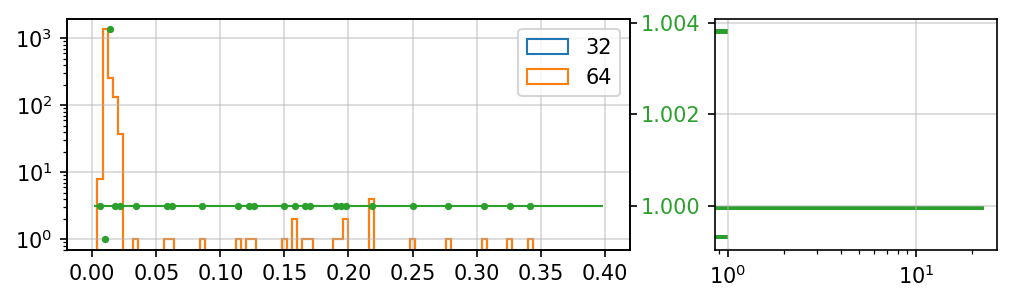

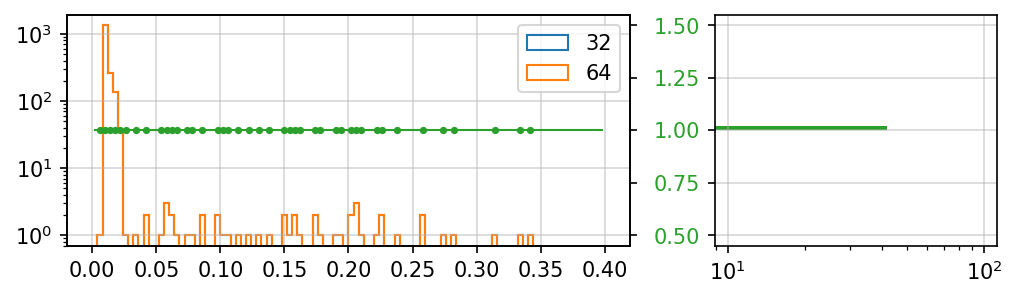

In [22]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'vxe', figsize=(8,2), bins=np.linspace(0, 0.4, 101), histtype='step')

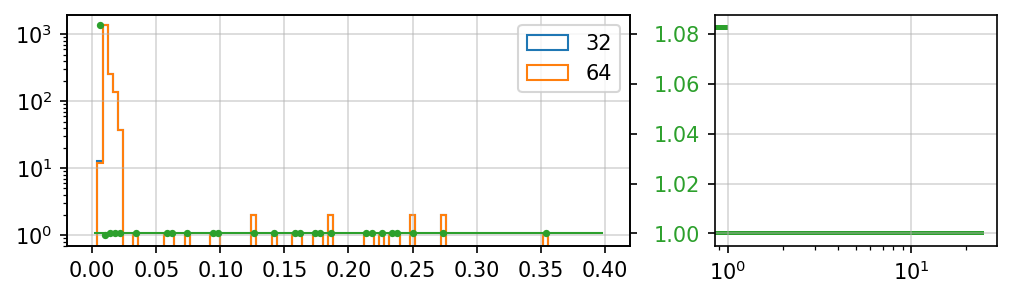

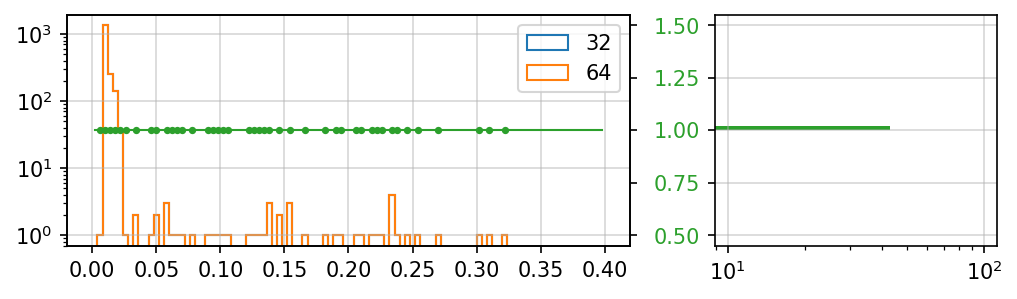

In [23]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'vye', figsize=(8,2), bins=np.linspace(0, 0.4, 101), histtype='step')

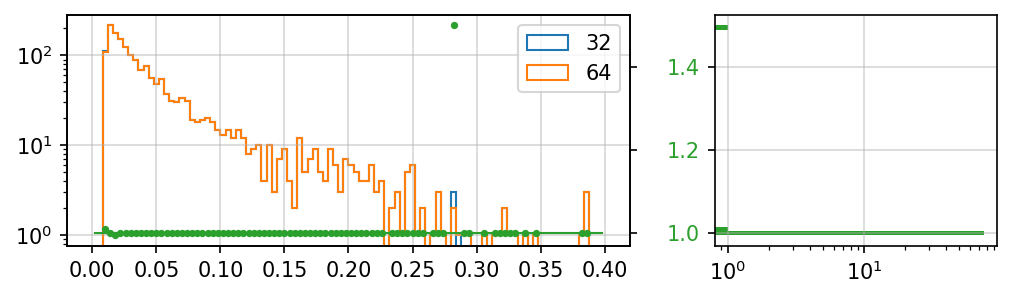

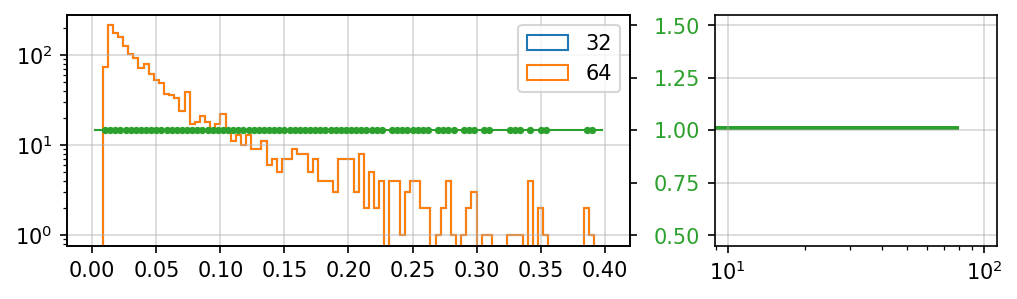

In [24]:
df_pairs = [(df_32_def, df_64_def), (df_32_sse_t, df_64_def_t)]
tk.plot_compare(df_pairs, 'vze', figsize=(8,2), bins=np.linspace(0, 0.4, 101), histtype='step')